#### Hello this is Anton's Notebook, our project is on market prediction. The reason I chose Bitcoin to predict is because other cryptos closely mirror the movements of this coin as well as the fact that we have group members interested in crypto currency. I am going to be predicting the overall predicted increase or decrease of the coin as a way to answer the question "How much movement will there be in BTC?"

In [132]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [133]:
# Prepping data for plotting
df = pd.read_csv("btc-usd-max.csv")
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df = df.sort_values('snapped_at')
df

snapped_at         price    market_cap  total_volume
0    2013-04-28 00:00:00+00:00    135.300000  1.500518e+09  0.000000e+00
1    2013-04-29 00:00:00+00:00    141.960000  1.575032e+09  0.000000e+00
2    2013-04-30 00:00:00+00:00    135.300000  1.501657e+09  0.000000e+00
3    2013-05-01 00:00:00+00:00    117.000000  1.298952e+09  0.000000e+00
4    2013-05-02 00:00:00+00:00    103.430000  1.148668e+09  0.000000e+00
...                        ...           ...           ...           ...
4363 2025-04-10 00:00:00+00:00  82622.170295  1.640568e+12  8.740822e+10
4364 2025-04-11 00:00:00+00:00  79596.357323  1.580023e+12  4.121352e+10
4365 2025-04-12 00:00:00+00:00  83439.288180  1.655869e+12  3.981357e+10
4366 2025-04-13 00:00:00+00:00  85305.097284  1.693601e+12  2.242893e+10
4367 2025-04-14 00:00:00+00:00  83600.820101  1.658923e+12  2.873113e+10

[4368 rows x 4 columns]

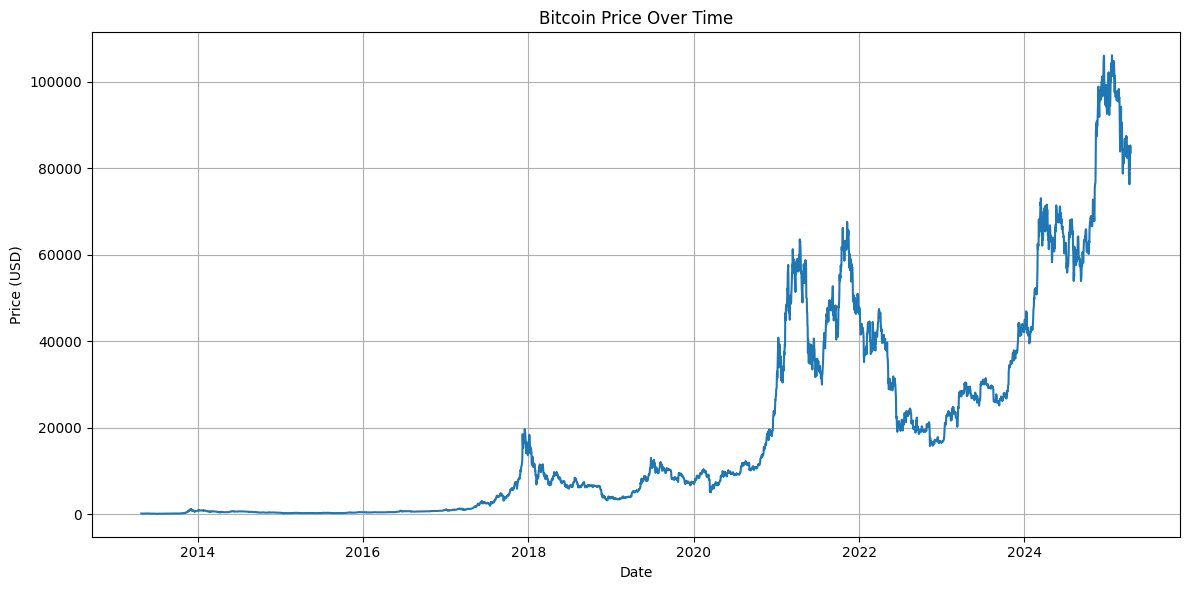

In [134]:
# Plotting Price vs Time
plt.figure(figsize=(12, 6))
plt.plot(df['snapped_at'], df['price'], label='BTC Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

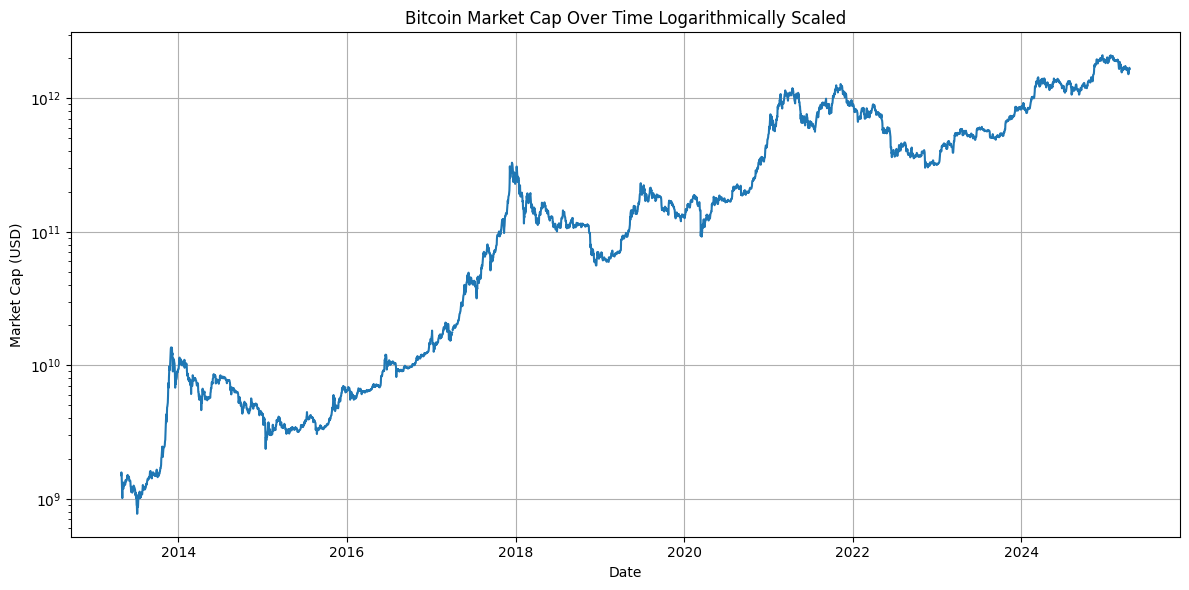

In [135]:
# Plotting Market Cap vs Time
plt.figure(figsize=(12, 6))
plt.plot(df['snapped_at'], df['market_cap'], label='BTC Price')
plt.title('Bitcoin Market Cap Over Time Logarithmically Scaled')
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

In [136]:
# Make New Features based on original columns
# From price
df['pct_change_1d'] = df['price'].pct_change(fill_method=None)
df['price_ma_7'] = df['price'].rolling(window=7).mean()
df['momentum_7d'] = df['price'] - df['price'].shift(7)

# From market_cap
df['market_cap_change_1d'] = df['market_cap'].pct_change(fill_method=None)

# From total_volume
df['volume_mean_7d'] = df['total_volume'].rolling(window=7).mean()
df['volume_std_7d'] = df['total_volume'].rolling(window=7).std()
df['volume_z'] = (df['total_volume'] - df['volume_mean_7d']) / df['volume_std_7d']

# Drop initial NaNs caused by rolling operations
df = df.dropna().reset_index(drop=True)

# Show sample
df

snapped_at         price    market_cap  total_volume  \
0    2013-12-27 00:00:00+00:00    734.270000  8.944473e+09  6.288180e+07   
1    2013-12-28 00:00:00+00:00    738.810000  9.002769e+09  2.812160e+07   
2    2013-12-29 00:00:00+00:00    726.470000  8.855252e+09  2.701830e+07   
3    2013-12-30 00:00:00+00:00    760.520000  9.270682e+09  2.471710e+07   
4    2013-12-31 00:00:00+00:00    755.160000  9.205344e+09  2.190350e+07   
...                        ...           ...           ...           ...   
4119 2025-04-10 00:00:00+00:00  82622.170295  1.640568e+12  8.740822e+10   
4120 2025-04-11 00:00:00+00:00  79596.357323  1.580023e+12  4.121352e+10   
4121 2025-04-12 00:00:00+00:00  83439.288180  1.655869e+12  3.981357e+10   
4122 2025-04-13 00:00:00+00:00  85305.097284  1.693601e+12  2.242893e+10   
4123 2025-04-14 00:00:00+00:00  83600.820101  1.658923e+12  2.873113e+10   

      pct_change_1d    price_ma_7  momentum_7d  market_cap_change_1d  \
0         -0.000436    669.954286    40.020000             -0.000056   
1          0.006183    690.338571   142.690000              0.006518   
2         -0.016703    701.224286    76.200000             -0.016386   
3          0.046870    717.620000   114.770000              0.046913   
4         -0.007048    731.222857    95.220000             -0.007048   
...             ...           ...          ...                   ...   
4119       0.082447  80993.416747    95.748143              0.082853   
4120      -0.036622  80483.755283 -3567.630251             -0.036905   
4121       0.048280  80424.795358  -412.719474              0.048003   
4122       0.022361  80668.968470  1709.211782              0.022787   
4123      -0.019979  81438.873687  5389.336519             -0.020476   

      volume_mean_7d  volume_std_7d  volume_z  
0       8.983114e+06   2.376709e+07  2.267787  
1       1.300049e+07   2.436479e+07  0.620613  
2       1.686024e+07   2.410069e+07  0.421484  
3       2.039126e+07   2.300451e+07  0.188043  
4       2.352033e+07   2.118644e+07 -0.076314  
...              ...            ...       ...  
4119    4.877476e+10   2.672633e+10  1.445521  
4120    4.943462e+10   2.643087e+10 -0.311042  
4121    5.002980e+10   2.611366e+10 -0.391222  
4122    5.110388e+10   2.453535e+10 -1.168720  
4123    5.004541e+10   2.543190e+10 -0.838093  

[4124 rows x 11 columns]

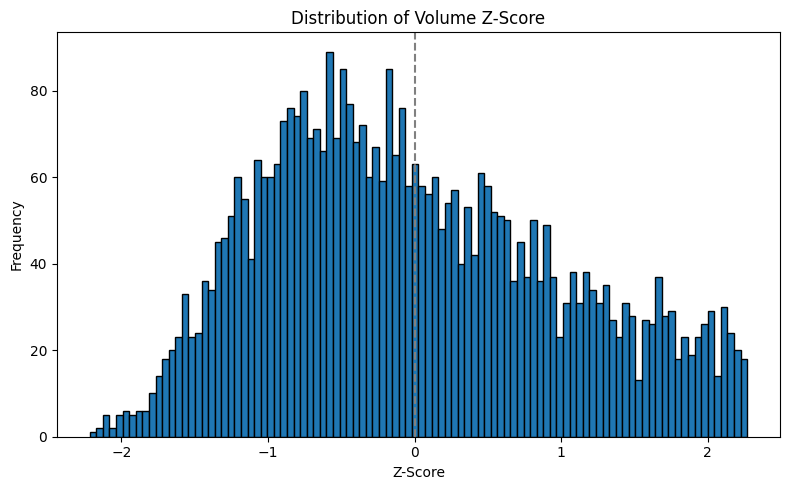

In [137]:
# Finding the distribution of Z-Score of Volume to confirm normality

plt.figure(figsize=(8, 5))
plt.hist(df['volume_z'], bins=100, edgecolor='black')
plt.title('Distribution of Volume Z-Score')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [138]:
# Valid predictor features (excluding 'price' to prevent leakage)
features = [
    'pct_change_1d',         # % change from previous day
    'momentum_7d',           # price_t - price_t-7
    'price_ma_7',            # 7-day moving average
    'market_cap_change_1d',  # % change in market cap
    'volume_z',              # standardized volume
    'volume_std_7d'          # volume volatility
]

# Step 1: Drop rows with missing data
df_clean = df[features + ['price']].dropna().copy()

# Step 2: Define the target as next day's price
df_clean['future_price'] = df_clean['price'].shift(-1)

# Step 3: Drop final row (no future_price)
df_clean = df_clean.dropna().reset_index(drop=True)

# Step 4: Separate features and target
X = df_clean[features]
y = df_clean['future_price']

# Step 5: Add constant (intercept) to X
X = sm.add_constant(X)

# Step 6: Fit OLS model
ols_model = sm.OLS(y, X).fit()

# Step 7: Display summary
print(ols_model.summary())


df_clean

                            OLS Regression Results                            
Dep. Variable:           future_price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.976e+05
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:42:52   Log-Likelihood:                -35000.
No. Observations:                4123   AIC:                         7.001e+04
Df Residuals:                    4116   BIC:                         7.006e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.7617 

pct_change_1d  momentum_7d    price_ma_7  market_cap_change_1d  \
0         -0.000436    40.020000    669.954286             -0.000056   
1          0.006183   142.690000    690.338571              0.006518   
2         -0.016703    76.200000    701.224286             -0.016386   
3          0.046870   114.770000    717.620000              0.046913   
4         -0.007048    95.220000    731.222857             -0.007048   
...             ...          ...           ...                   ...   
4118      -0.035997 -8908.497249  80979.738441             -0.041966   
4119       0.082447    95.748143  80993.416747              0.082853   
4120      -0.036622 -3567.630251  80483.755283             -0.036905   
4121       0.048280  -412.719474  80424.795358              0.048003   
4122       0.022361  1709.211782  80668.968470              0.022787   

      volume_z  volume_std_7d         price  future_price  
0     2.267787   2.376709e+07    734.270000    738.810000  
1     0.620613   2.436479e+07    738.810000    726.470000  
2     0.421484   2.410069e+07    726.470000    760.520000  
3     0.188043   2.300451e+07    760.520000    755.160000  
4    -0.076314   2.118644e+07    755.160000    767.740000  
...        ...            ...           ...           ...  
4118  0.237592   2.064853e+10  76329.090356  82622.170295  
4119  1.445521   2.672633e+10  82622.170295  79596.357323  
4120 -0.311042   2.643087e+10  79596.357323  83439.288180  
4121 -0.391222   2.611366e+10  83439.288180  85305.097284  
4122 -1.168720   2.453535e+10  85305.097284  83600.820101  

[4123 rows x 8 columns]

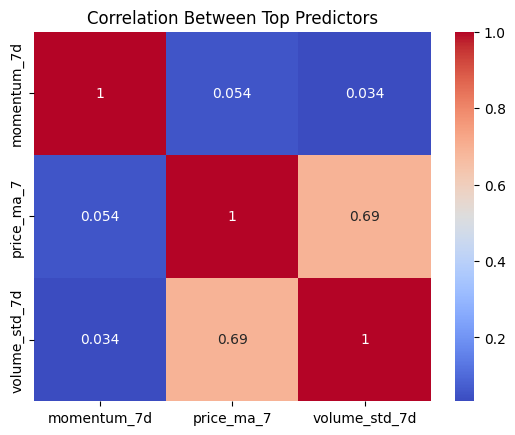

In [139]:
# Looking for collinearity between top predictors
selected = df[['momentum_7d', 'price_ma_7', 'volume_std_7d']]
corr_matrix = selected.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Top Predictors")
plt.show()


In [143]:
# Select clean features and target
features = ['momentum_7d', 'price_ma_7', 'volume_std_7d']
df_clean = df[features + ['price']].dropna()
df_clean['future_price'] = df_clean['price'].shift(-1)
df_clean = df_clean.dropna()

X = df_clean[features]
y = df_clean['future_price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train pipeline
degree = 2
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the most recent row
latest = df[features].iloc[-1:]

# Scale and transform for polynomial regression
X_latest = model.named_steps['standardscaler'].transform(latest)
X_latest_poly = model.named_steps['polynomialfeatures'].transform(X_latest)

# Predict tomorrow's price
tomorrow_pred = model.named_steps['linearregression'].predict(X_latest_poly)

print(f"Predicted BTC price for tomorrow: ${tomorrow_pred[0]:,.2f}")
print(f"Polynomial Regression (degree={degree})")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Predicted BTC price for tomorrow: $83,566.53
Polynomial Regression (degree=2)
Mean Squared Error: 1233793.3221
R² Score: 0.9978


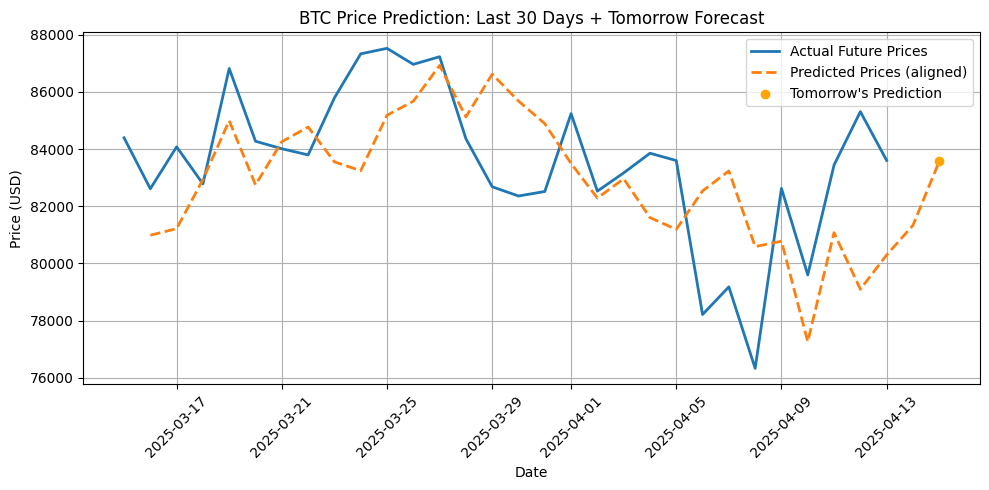

In [144]:
# Prepare last 30 days of features and actuals
df_recent = df[features + ['snapped_at', 'price']].dropna().iloc[-31:].copy()
df_recent['future_price'] = df_recent['price'].shift(-1)

# Drop last row (it doesn't have future_price)
df_recent = df_recent.iloc[:-1]

# Predict next-day prices for the last 30 rows
X_recent = df_recent[features]
X_recent_scaled = model.named_steps['standardscaler'].transform(X_recent)
X_recent_poly = model.named_steps['polynomialfeatures'].transform(X_recent_scaled)
y_pred = model.named_steps['linearregression'].predict(X_recent_poly)

# Get tomorrow's prediction
latest_features = df[features].iloc[[-1]]
X_latest = model.named_steps['standardscaler'].transform(latest_features)
X_latest_poly = model.named_steps['polynomialfeatures'].transform(X_latest)
tomorrow_pred = model.named_steps['linearregression'].predict(X_latest_poly)[0]

# Build date range
dates = df_recent['snapped_at'].tolist()
dates.append(dates[-1] + timedelta(days=1))
y_pred_extended = list(y_pred)
y_pred_extended.append(tomorrow_pred)

# Shift predictions forward to match the days they were predicting
prediction_dates = df_recent['snapped_at'] + timedelta(days=1)
prediction_dates = prediction_dates.tolist()
prediction_dates.append(prediction_dates[-1] + timedelta(days=1))

# Plot using adjusted dates
plt.figure(figsize=(10, 5))
plt.plot(df_recent['snapped_at'], df_recent['future_price'], label='Actual Future Prices', linewidth=2)
plt.plot(prediction_dates, y_pred_extended, label='Predicted Prices (aligned)', linestyle='--', linewidth=2)
plt.scatter(prediction_dates[-1], y_pred_extended[-1], color='orange', label="Tomorrow's Prediction", zorder=5)
plt.title("BTC Price Prediction: Last 30 Days + Tomorrow Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()